In [1]:
import itertools
import json
from pathlib import Path
from zipfile import ZipFile
import os
from tqdm import tqdm
import pandas as pd
import numpy as np


## NYTimes Dataset

In [2]:
# You'll need to change this to match where you've saved the short-cut to the class
# folder in your Google Drive.
# "C:\Users\xinyu\Desktop\Baruch learning\Semester2\MTH 9796 - Statistical Natural Language P\L3\drive-download-20220411T132035Z-001"

NYT_PATH = Path("Data\drive-download-20220411T132035Z-001")
assert NYT_PATH.exists(), f"Can't find {NYT_PATH}. Did you remember to mount your Google-Drive?"

In [3]:
NYT_files_num = len(os.listdir(NYT_PATH))
NYT_files_num

12

In [4]:
def iter_nytimes_docs(root):
  """Iterate over all doc" dictionaries in nyt news-story repository."""
  for path in root.glob("*.json"):
    dd = json.load(path.open())
    docs = dd['response']['docs']
    for doc in docs:
      yield doc

def extract_dated_headline(doc):
  """Extract just the (pub_date, headline)-tuple from a "doc" dictionary."""
  return (
      pd.Timestamp(doc['pub_date']),
      doc['headline']['main']
  )


# Show the first 5 articles in the repository
N = 5
ii = iter_nytimes_docs(NYT_PATH)
for _ in range(N):
  print(extract_dated_headline(next(ii)))

(Timestamp('2020-04-01 00:00:07+0000', tz='UTC'), 'Human Rights Group Says Two U.S. Strikes Killed Somali Civilians')
(Timestamp('2020-04-01 00:01:20+0000', tz='UTC'), '‘Never Thought I Would Need It’: Americans Put Pride Aside to Seek Aid')
(Timestamp('2020-04-01 00:43:34+0000', tz='UTC'), '$30 Million in Illegal Drugs Seized From Cross-Border Tunnel in San Diego, U.S. Says')
(Timestamp('2020-04-01 01:38:10+0000', tz='UTC'), 'As Furloughs Grow, Kennedy Center Defends Use of $25 Million in Aid')
(Timestamp('2020-04-01 02:00:03+0000', tz='UTC'), 'Historic Town in Veszprém County')


In [5]:
Date_list = []
Headline_list = []

for i,doc in enumerate(iter_nytimes_docs(NYT_PATH)):
    Date_list.append(str(doc['pub_date'])[:10])
    Headline_list.append(doc['headline']['main'])


nyt = pd.DataFrame({'created_utc_dt':Date_list,'title':Headline_list})
nyt

,created_utc_dt,title
0,2020-04-01,Human Rights Group Says Two U.S. Strikes Kille...
1,2020-04-01,‘Never Thought I Would Need It’: Americans Put...
2,2020-04-01,$30 Million in Illegal Drugs Seized From Cross...
3,2020-04-01,"As Furloughs Grow, Kennedy Center Defends Use ..."
4,2020-04-01,Historic Town in Veszprém County
...,...,...
57932,2021-03-31,Pitchers Beware: Giancarlo Stanton Is Feeling ...
57933,2021-03-31,‘Rebuild the Backbone of America’: Biden Unvei...
57934,2021-03-31,"Deaths, stillbirths and pregnancy complication..."
57935,2021-03-31,Biden and His Trillions


## WallStreetBets 

In [6]:
# You'll need to change this to match where you've saved the short-cut to the class
# folder in your Google Drive.
WSB_PATH = Path("Data\wsb-20200401_20210401-20220411T134036Z-001\wsb-20200401_20210401")
assert WSB_PATH.exists(), f"Can't find {WSB_PATH}. Did you remember to mount your Google-Drive?"

In [7]:

files_num = len(os.listdir(WSB_PATH))
files_num

10812

In [8]:
def iter_wsb_dataframes(root):
  """Iterate over all wsb dataframes."""
  for path in root.glob("*.csv"):
    yield pd.read_csv(path, index_col=0)


# concat the first 10 wsb-CSVs into one big dataframe.
# ...this takes a while to run...
wsb25 = pd.concat(itertools.islice(iter_wsb_dataframes(WSB_PATH), files_num))

In [9]:
wsb25 = wsb25.sort_values('created_utc_dt',ascending=True).reset_index(drop=True)
wsb25

,author,created_utc,title,url,created,d_,created_utc_dt
0,CalculatedRoulette,1585693701,Pelosi : Bear Martyr Goddess,https://www.kqed.org/news/11803203/pelosi-lunc...,1.585694e+09,"{'author': 'CalculatedRoulette', 'created_utc'...",2020-03-31 22:28:21
1,Pokonic,1585693772,"Correct me if I'm wrong, but wouldn't any redu...",https://www.reddit.com/r/wallstreetbets/commen...,1.585694e+09,"{'author': 'Pokonic', 'created_utc': 158569377...",2020-03-31 22:29:32
2,toqueh,1585693799,What good is debt when daddy Jpow is just gonn...,https://thepeach.ca/?p=242053,1.585694e+09,"{'author': 'toqueh', 'created_utc': 1585693799...",2020-03-31 22:29:59
3,Chotothegoth,1585693800,The case for 70m unemployment in the us,https://www.reddit.com/r/wallstreetbets/commen...,1.585694e+09,"{'author': 'Chotothegoth', 'created_utc': 1585...",2020-03-31 22:30:00
4,lol558237,1585693851,Dont be a stubborn bull like me,https://i.redd.it/7az9p6cf43q41.jpg,1.585694e+09,"{'author': 'lol558237', 'created_utc': 1585693...",2020-03-31 22:30:51
...,...,...,...,...,...,...,...
1081129,MoRaLoSeVisH_13,1617235038,"Soon , fellow 🦍🦍🦍",https://i.redd.it/m8to12bkcgq61.jpg,1.617235e+09,"{'author': 'MoRaLoSeVisH_13', 'created_utc': 1...",2021-03-31 23:57:18
1081130,Electrozart,1617235042,Miley Cryus giving away $50 of free stock via ...,https://www.reddit.com/r/wallstreetbets/commen...,1.617235e+09,"{'author': 'Electrozart', 'created_utc': 16172...",2021-03-31 23:57:22
1081131,lexmark0331,1617235046,HOFV Mega squeeze Opportunity,https://i.redd.it/vca4pnalcgq61.jpg,1.617235e+09,"{'author': 'lexmark0331', 'created_utc': 16172...",2021-03-31 23:57:26
1081132,chefthmst1983,1617235173,So what happened end of day on the DOW...hell ...,https://i.redd.it/n3oh1tvycgq61.jpg,1.617235e+09,"{'author': 'chefthmst1983', 'created_utc': 161...",2021-03-31 23:59:33


## Downloading Stock Data

In [10]:
import yfinance
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols

In [11]:
tsla = yfinance.download(['TSLA'], pd.Timestamp('2020-04-01'), pd.Timestamp('2021-04-01'), period="1d") 
tsla.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-01,100.800003,102.790001,95.019997,96.311996,96.311996,66766000
2020-04-02,96.206001,98.851997,89.279999,90.893997,90.893997,99292000
2020-04-03,101.900002,103.098000,93.678001,96.001999,96.001999,112810500
2020-04-06,102.239998,104.199997,99.592003,103.248001,103.248001,74509000
2020-04-07,109.000000,113.000000,106.468002,109.089996,109.089996,89599000


In [12]:
traded_symbols = get_nasdaq_symbols()
traded_symbols.iloc[:,:4].head()

,Nasdaq Traded,Security Name,Listing Exchange,Market Category
Symbol,,,,
A,True,"Agilent Technologies, Inc. Common Stock",N,
AA,True,Alcoa Corporation Common Stock,N,
AAA,True,Listed Funds Trust AAF First Priority CLO Bond...,P,
AAAU,True,Goldman Sachs Physical Gold ETF Shares,Z,
AAC,True,Ares Acquisition Corporation Class A Ordinary ...,N,


In [13]:
all_symbols = list(traded_symbols[~traded_symbols.ETF].index.unique())
all_securitynames = list(traded_symbols[~traded_symbols.ETF]['Security Name'].unique())

all_symbols[:10]

['A', 'AA', 'AAC', 'AAC.U', 'AAC.W', 'AACG', 'AACI', 'AACIU', 'AACIW', 'AADI']

In [14]:
all_securitynames[:10]

['Agilent Technologies, Inc. Common Stock',
 'Alcoa Corporation Common Stock ',
 'Ares Acquisition Corporation Class A Ordinary Shares',
 'Ares Acquisition Corporation Units, each consisting of one Class A ordinary share, and one-fifth of one redeemable warrant',
 'Ares Acquisition Corporation Redeemable Warrants, each whole warrant exercisable for one Class A ordinary share at an exercise price of $11.50',
 'ATA Creativity Global - American Depositary Shares, each representing two common shares',
 'Armada Acquisition Corp. I - Common Stock',
 'Armada Acquisition Corp. I - Unit',
 'Armada Acquisition Corp. I - Warrant',
 'Aadi Bioscience, Inc. - Common Stock']

## Test-Hypothesis-1 

### a. Produce a time-series of (publication-time, entity-name)-tuples:

i. Choose a Named Entity Recognition (NER) tool that is well suited for the
specific dataset you are analyzing. You may want to try several and/or
adjust the parameterization of the NER tool to see which performs the best.

ii. Explain which technique the NER tool uses (e.g. word-list, HMM, CRF,
CRF-LSTM hybrid, Transformer, etc.)

In [15]:
from textacy.extract import entities

import spacy
from spacy import displacy


##### run in anaconda

%%bash
python -m spacy download en_core_web_sm


In [18]:
nlp = spacy.load('en_core_web_sm') 

Example

In [23]:
sample_text = wsb25.loc[2,'title']
sample_text

'What good is debt when daddy Jpow is just gonna step in &amp; pay off everything'

In [24]:
nlp = spacy.load('en_core_web_sm') 
doc = nlp(sample_text)

In [25]:
displacy.render(doc, style='ent', jupyter=True)

In [26]:
[(e.text,e.label_) for e in entities(doc)]

[('Jpow', 'PERSON'), ('&', 'ORG')]

In [27]:
spacy.explain("ORG"), spacy.explain("MONEY"), spacy.explain('PRODUCT')

('Companies, agencies, institutions, etc.',
 'Monetary values, including unit',
 'Objects, vehicles, foods, etc. (not services)')

use entity recognition method to identify entity in titles

In [30]:
def recognize_entity(df, re_method=entities):

    entity_list = []
    entity_label_list = []
    datetime_list = []

    for index in tqdm(df.index):
        # print(df.loc[index, 'created_utc_dt'])
        datetime = df.loc[index, 'created_utc_dt'].split(' ')[0]
        doc = nlp(df.loc[index, 'title'])
        # print(datetime, doc)
        
    # for index, row in tqdm(wsb25.iterrows()):
        # datetime = row['created_utc_dt'].split(' ')[0]
        # doc = nlp(row['title'])

        for entity in re_method(doc):
            entity_list.append(entity.text)
            entity_label_list.append(entity.label_)
            datetime_list.append(datetime)

    return pd.DataFrame({'Entity': entity_list, 'Entity_label': entity_label_list, 'Date': datetime_list})


```entities``` has ```text``` and ```label_``` attributes

In [31]:
df_nyt_entity = recognize_entity(nyt, entities)
df_nyt_entity = df_nyt_entity[df_nyt_entity['Entity_label'].isin(['ORG','PRODUCT'])]

df_nyt_entity.head()


100%|██████████| 57937/57937 [03:04<00:00, 313.45it/s]


,Entity,Entity_label,Date
0,Human Rights Group,ORG,2020-04-01
8,Kennedy Center Defends Use,ORG,2020-04-01
12,Trump Calls New Fuel Economy Rule a Boon,ORG,2020-04-01
16,Jazz Trumpet Virtuoso,ORG,2020-04-01
18,Coronavirus,ORG,2020-04-01


In [32]:
nyt_sorted_entity = df_nyt_entity.groupby(['Entity']).count().sort_values('Entity_label',ascending=False).reset_index().loc[:200,:]
nyt_sorted_entity.head(10)

# a lot of entities has nothing to do with corporation, need further selection

,Entity,Entity_label,Date
0,Trump,765,765
1,Coronavirus,430,430
2,Biden,411,411
3,Senate,239,239
4,House,233,233
5,White House,224,224
6,Dies,215,215
7,Supreme Court,201,201
8,N.Y.C.,118,118
9,Congress,116,116


In [35]:
from thefuzz import fuzz
from thefuzz import process

# https://github.com/seatgeek/thefuzz

In [36]:
fuzz.ratio("Apple",'Aadi Bioscience, Inc. - Common Stock')

10

In [37]:
## fuzz match
process.extractOne("Coronavirus", all_securitynames)

('Container Store (The) Common Stock', 58)

In [38]:
process.extractOne("Twitter", all_securitynames)

('Twitter, Inc. Common Stock', 90)

In [39]:
process.extractOne("Amazon", all_securitynames)

('Amazon.com, Inc. - Common Stock', 90)

'ACU'

fuzz match entity to company name of NASDAQ

In [40]:
temp = nyt_sorted_entity['Entity'].apply(lambda x: process.extractOne(x, all_securitynames))
nyt_sorted_entity['fuzzmatch_name'] = temp.apply(lambda x: x[0])
nyt_sorted_entity['fuzzmatch_symbol'] = temp.apply(lambda x: traded_symbols[traded_symbols['Security Name']==x[0]].index[0])
nyt_sorted_entity['fuzzmatch_ratio'] = temp.apply(lambda x: x[1])
nyt_sorted_entity.sort_values(['fuzzmatch_ratio','Entity_label'],ascending=False).head(15)

,Entity,Entity_label,Date,fuzzmatch_name,fuzzmatch_symbol,fuzzmatch_ratio
4,House,233,233,"Full House Resorts, Inc. - Common Stock",FLL,90
15,Amazon,81,81,"Amazon.com, Inc. - Common Stock",AMZN,90
16,Capitol,64,64,"Capitol Federal Financial, Inc. - Common Stock",CFFN,90
18,Time,53,53,UTime Limited - Ordinary Shares,UTME,90
25,State,39,39,Allstate Corporation (The) Common Stock,ALL,90
27,Twitter,38,38,"Twitter, Inc. Common Stock",TWTR,90
31,Court,29,29,Newcourt Acquisition Corp - Unit,NCACU,90
35,New York Times,28,28,New York Times Company (The) Common Stock,NYT,90
37,Apple,27,27,Apple Inc. - Common Stock,AAPL,90
38,Vaccines,26,26,"Blue Water Vaccines, Inc. - Common Stock",BWV,90


In [41]:
nyt_selected_entities = ['Amazon','Capitol','Twitter','Boeing','Apple']

In [42]:
df_wsb_entity = recognize_entity(wsb25.sample(
    n=50000, replace=False, random_state=1), entities)
df_wsb_entity = df_wsb_entity[df_wsb_entity['Entity_label'].isin(['PERSON','ORG','PRODUCT','GPE'])]
df_wsb_entity.head()

100%|██████████| 50000/50000 [02:47<00:00, 298.00it/s]


,Entity,Entity_label,Date
0,GME,ORG,2021-02-04
1,SCOTTSDALE,ORG,2021-01-27
2,AZ,ORG,2021-01-27
4,CBD Life Sciences,ORG,2021-01-27
5,LBC Bioscience Inc.,ORG,2021-01-27


In [45]:
df_wsb_entity.groupby(['Entity']).count().sort_values('Entity_label',ascending=False).head(10)


,Entity_label,Date
Entity,,
🚀,16037,16037
GME,3777,3777
AMC,2710,2710
WSB,808,808
Robinhood,765,765
NOK,722,722
BB,420,420
PLTR,298,298
US,241,241


In [46]:
wsb_selected_entities = ['GME','AMC','BB','NOK','PLTR']


### b. [3 points] Choose 5 corporations that your NER was able to identify and measure the following time series:

i. Mentions per day -- as measured by your NER.

In [47]:
name_symbol_match = {}

for name in nyt_selected_entities:
    fuzzmatch_symbol = nyt_sorted_entity[nyt_sorted_entity['Entity']==name]['fuzzmatch_symbol'].values[0]
    name_symbol_match[name] = fuzzmatch_symbol

name_symbol_match

{'Amazon': 'AMZN',
 'Capitol': 'CFFN',
 'Twitter': 'TWTR',
 'Boeing': 'BA',
 'Apple': 'AAPL'}

In [48]:
df_nyt = df_nyt_entity[df_nyt_entity['Entity'].isin(nyt_selected_entities)
]
df_nyt['Entity'] = df_nyt['Entity'].apply(lambda x: name_symbol_match[x])
# df_nyt['Entity'] = df_nyt.pop('Entity').replace(name_symbol_match)
df_nyt = df_nyt.groupby(['Entity','Date']).count()
df_nyt = df_nyt.rename(columns={'Entity_label':'Mentions per day'})
df_nyt = df_nyt.swaplevel()
df_nyt = df_nyt.sort_index(level=['Date','Entity'])
df_nyt

C:\Users\xinyu\AppData\Local\Temp/ipykernel_33556/893108918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nyt['Entity'] = df_nyt['Entity'].apply(lambda x: name_symbol_match[x])


,,Mentions per day
Date,Entity,
2020-04-01,AMZN,1
2020-04-02,AMZN,1
2020-04-05,AMZN,1
2020-04-10,AAPL,1
2020-04-15,AAPL,1
...,...,...
2021-03-25,CFFN,2
2021-03-26,CFFN,1
2021-03-28,AMZN,1


In [49]:

df_wsb = df_wsb_entity[df_wsb_entity['Entity'].isin(wsb_selected_entities)
].groupby(['Entity','Date']).count()
df_wsb = df_wsb.rename(columns={'Entity_label':'Mentions per day'})
df_wsb = df_wsb.swaplevel()
df_wsb = df_wsb.sort_index(level=['Date','Entity'])
df_wsb

Mentions per day
Date       Entity                  
2020-04-14 GME                    1
2020-04-28 GME                    1
2020-06-04 GME                    1
2020-06-08 AMC                    1
2020-06-09 AMC                    1
...                             ...
2021-03-30 AMC                    5
           GME                    5
2021-03-31 AMC                    4
           GME                    4
           PLTR                   3

[343 rows x 1 columns]

ii. Daily high minus low (as an approximation for volatility.) -- from market
data.

iii. Daily trading volume -- from market data.

NYT

In [50]:
nyt_stock_data = yfinance.download([name_symbol_match[x] for x in nyt_selected_entities], pd.Timestamp('2020-04-01'), pd.Timestamp('2021-04-01'), period="1d").stack()
nyt_stock_data

[*********************100%***********************]  5 of 5 completed


Adj Close        Close         High          Low  \
Date                                                                  
2020-04-01 AAPL    59.411121    60.227501    62.180000    59.782501   
           AMZN  1907.699951  1907.699951  1944.959961  1893.000000   
           BA     130.699997   130.699997   144.380005   130.000000   
           CFFN     9.997866    11.260000    11.340000    10.910000   
           TWTR    23.320000    23.320000    24.389999    23.049999   
...                      ...          ...          ...          ...   
2021-03-31 AAPL   121.428291   122.150002   123.519997   121.150002   
           AMZN  3094.080078  3094.080078  3119.330078  3062.500000   
           BA     254.720001   254.720001   257.880005   253.360001   
           CFFN    12.247944    13.250000    13.570000    13.230000   
           TWTR    63.630001    63.630001    64.980003    63.270000   

                        Open     Volume  
Date                                     
2020-04-01 AAPL    61.625000  176218400  
           AMZN  1932.969971    4121900  
           BA     138.910004   41899700  
           CFFN    11.110000     556600  
           TWTR    23.700001   20027000  
...                      ...        ...  
2021-03-31 AAPL   121.650002  118323800  
           AMZN  3064.060059    3093900  
           BA     254.699997   14138500  
           CFFN    13.510000     832900  
           TWTR    63.980000   14479800  

[1260 rows x 6 columns]

In [51]:
df_nyt_merge = df_nyt.copy()

df_nyt_merge['Volume'] = nyt_stock_data['Volume']
df_nyt_merge['Volatility'] = (nyt_stock_data['High'] - nyt_stock_data['Low'])/nyt_stock_data['Open']
df_nyt_merge['Id'] = df_nyt_merge.index.get_level_values(level='Entity')
# df_nyt_merge['Mentions per day after qcut'] = pd.qcut(df_nyt_merge['Mentions per day'],3,duplicates='drop').apply(lambda x: int(x.mid))
df_nyt_merge['Mentions per day after qcut'] = df_nyt_merge['Mentions per day']
df_nyt_merge.head()

,,Mentions per day,Volume,Volatility,Id,Mentions per day after qcut
Date,Entity,,,,,
2020-04-01,AMZN,1,4121900.0,0.026881,AMZN,1
2020-04-02,AMZN,1,4336000.0,0.019736,AMZN,1
2020-04-05,AMZN,1,NaN,NaN,AMZN,1
2020-04-10,AAPL,1,NaN,NaN,AAPL,1
2020-04-15,AAPL,1,131154400.0,0.020184,AAPL,1


In [52]:
wsb_stock_data = yfinance.download(wsb_selected_entities, pd.Timestamp('2020-04-01'), pd.Timestamp('2021-04-01'), period="1d").stack()
wsb_stock_data

[*********************100%***********************]  5 of 5 completed


Adj Close       Close        High         Low    Open  \
Date                                                                      
2020-04-01 AMC     2.620000    2.620000    3.040000    2.500000    3.00   
           BB      3.360000    3.360000    3.680000    3.300000    3.40   
           GME     3.250000    3.250000    3.490000    3.120000    3.45   
           NOK     2.970000    2.970000    3.070000    2.970000    3.04   
2020-04-02 AMC     2.240000    2.240000    2.780000    2.180000    2.74   
...                     ...         ...         ...         ...     ...   
2021-03-31 AMC    10.210000   10.210000   10.470000   10.050000   10.40   
           BB      8.430000    8.430000    8.730000    8.360000    8.61   
           GME   189.820007  189.820007  199.460007  187.110001  197.50   
           NOK     3.960000    3.960000    4.000000    3.960000    3.97   
           PLTR   23.290001   23.290001   23.850000   22.379999   22.50   

                     Volume  
Date                         
2020-04-01 AMC    5898600.0  
           BB    11581300.0  
           GME    4568700.0  
           NOK   22136800.0  
2020-04-02 AMC    8808100.0  
...                     ...  
2021-03-31 AMC   29832300.0  
           BB    32865200.0  
           GME    8393800.0  
           NOK   18639300.0  
           PLTR  61458500.0  

[1134 rows x 6 columns]

In [53]:
df_wsb_merge = df_wsb.copy()

df_wsb_merge['Volume'] = wsb_stock_data['Volume']
df_wsb_merge['Volatility'] = (wsb_stock_data['High'] - wsb_stock_data['Low'])/wsb_stock_data['Open']
df_wsb_merge['Id'] = df_wsb_merge.index.get_level_values(level='Entity')
# df_wsb_merge['Mentions per day after qcut'] = pd.qcut(df_wsb_merge['Mentions per day'],5,duplicates='drop').apply(lambda x: int(x.mid))
df_wsb_merge['Mentions per day after qcut'] = pd.qcut(df_wsb_merge['Mentions per day'],5,duplicates='drop')
df_wsb_merge.head()

,,Mentions per day,Volume,Volatility,Id,Mentions per day after qcut
Date,Entity,,,,,
2020-04-14,GME,1,13506600.0,0.255278,GME,"(0.999, 2.0]"
2020-04-28,GME,1,5200200.0,0.165541,GME,"(0.999, 2.0]"
2020-06-04,GME,1,3514300.0,0.078829,GME,"(0.999, 2.0]"
2020-06-08,AMC,1,8587100.0,0.106858,AMC,"(0.999, 2.0]"
2020-06-09,AMC,1,7394300.0,0.103279,AMC,"(0.999, 2.0]"


c. [5 points] Does the data support hypothesis-1? Analyze the relationship between
the mentions-per-day and the volatility and trading-volume measures. Use
appropriate hypothesis testing techniques to decide.


In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

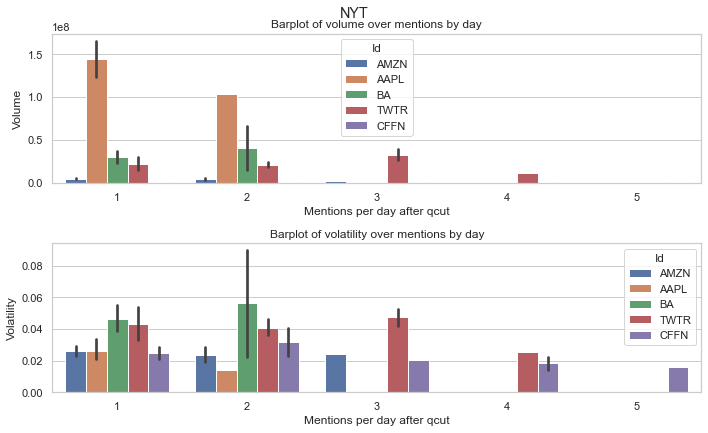

In [55]:
fig = plt.figure(figsize=(10, 6))

ax = plt.subplot(211)
sns.barplot(data=df_nyt_merge, x='Mentions per day after qcut',
            y='Volume', hue="Id", ax=ax)
ax.set_title('Barplot of volume over mentions by day')

ax = plt.subplot(212)
sns.barplot(data=df_nyt_merge, x='Mentions per day after qcut',
            y='Volatility', hue="Id", ax=ax)
ax.set_title('Barplot of volatility over mentions by day')

plt.tight_layout()
plt.suptitle("NYT",y=1)
plt.show()

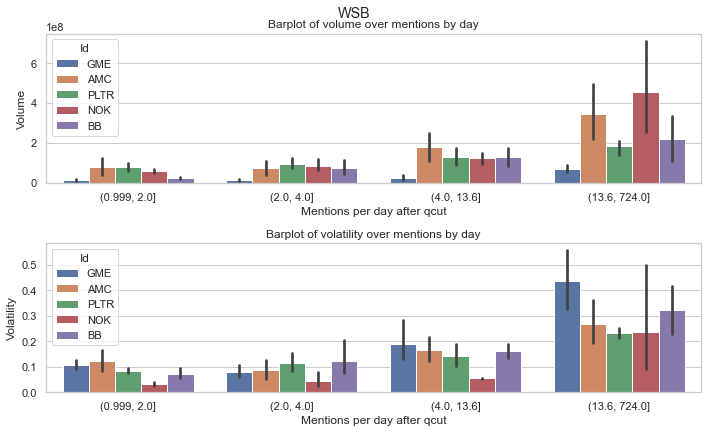

In [56]:
fig = plt.figure(figsize=(10, 6))

ax = plt.subplot(211)
sns.barplot(data=df_wsb_merge, x='Mentions per day after qcut',
            y='Volume', hue="Id", ax=ax)
ax.set_title('Barplot of volume over mentions by day')

ax = plt.subplot(212)
sns.barplot(data=df_wsb_merge, x='Mentions per day after qcut',
            y='Volatility', hue="Id", ax=ax)
ax.set_title('Barplot of volatility over mentions by day')

plt.tight_layout()
plt.suptitle("WSB",y=1)
plt.show()

hypothesis test:

## Test-Hypothesis-2 

sample

In [57]:
from textblob import TextBlob

In [58]:
tb = TextBlob(nyt.loc[0,'title'])
tb.sentiment.polarity, tb.sentiment.subjectivity

(-0.1, 0.05)

In [59]:
def sa_textblob_polarity(txt):
    return TextBlob(txt).sentiment.polarity

In [60]:
txt = nyt.loc[1,'title']
txt

'‘Never Thought I Would Need It’: Americans Put Pride Aside to Seek Aid'

In [61]:
sa_textblob_polarity(txt)

0.0

In [62]:
def recognize_entity(df, iter_method=entities, sa_method=None):

    entity_list = []
    entity_label_list = []
    datetime_list = []
    sentiment_list = []

    for index in tqdm(df.index):
        # print(df.loc[index, 'created_utc_dt'])
        datetime = df.loc[index, 'created_utc_dt'].split(' ')[0]
        txt = df.loc[index, 'title']
        doc = nlp(txt)

        sentiment = None
        if sa_method:
            sentiment = sa_method(txt)

        for entity in iter_method(doc):
            entity_list.append(entity.text)
            entity_label_list.append(entity.label_)
            datetime_list.append(datetime)
            sentiment_list.append(sentiment)

    return pd.DataFrame({'Entity': entity_list, 'Entity_label': entity_label_list, 'Date': datetime_list, 'Sentiment': sentiment_list})


In [63]:
df_nyt_entity = recognize_entity(nyt, entities, sa_textblob_polarity)
df_nyt_entity = df_nyt_entity[df_nyt_entity['Entity_label'].isin(['ORG','PRODUCT'])]

df_nyt_entity.head()


100%|██████████| 57937/57937 [03:14<00:00, 297.91it/s]


,Entity,Entity_label,Date,Sentiment
0,Human Rights Group,ORG,2020-04-01,-0.100000
8,Kennedy Center Defends Use,ORG,2020-04-01,-0.100000
12,Trump Calls New Fuel Economy Rule a Boon,ORG,2020-04-01,0.136364
16,Jazz Trumpet Virtuoso,ORG,2020-04-01,-0.200000
18,Coronavirus,ORG,2020-04-01,0.000000


In [64]:
df_nyt_entity['Positive Mentions'] = (np.sign(df_nyt_entity['Sentiment'])+1)/2
df_nyt_entity['Negative Mentions'] = 1-df_nyt_entity['Positive Mentions']
df_nyt_entity.head()

,Entity,Entity_label,Date,Sentiment,Positive Mentions,Negative Mentions
0,Human Rights Group,ORG,2020-04-01,-0.100000,0.0,1.0
8,Kennedy Center Defends Use,ORG,2020-04-01,-0.100000,0.0,1.0
12,Trump Calls New Fuel Economy Rule a Boon,ORG,2020-04-01,0.136364,1.0,0.0
16,Jazz Trumpet Virtuoso,ORG,2020-04-01,-0.200000,0.0,1.0
18,Coronavirus,ORG,2020-04-01,0.000000,0.5,0.5


In [65]:
df_nyt = df_nyt_entity[df_nyt_entity['Entity'].isin(nyt_selected_entities)
]
df_nyt['Entity'] = df_nyt['Entity'].apply(lambda x: name_symbol_match[x])
# df_nyt['Entity'] = df_nyt.pop('Entity').replace(name_symbol_match)
df_nyt = df_nyt.groupby(['Entity','Date'])[['Positive Mentions','Negative Mentions']].sum()
# df_nyt = df_nyt.rename(columns={'Entity_label':'Mentions per day'})
df_nyt = df_nyt.swaplevel()
df_nyt = df_nyt.sort_index(level=['Date','Entity'])
df_nyt

C:\Users\xinyu\AppData\Local\Temp/ipykernel_33556/2192017621.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nyt['Entity'] = df_nyt['Entity'].apply(lambda x: name_symbol_match[x])


,,Positive Mentions,Negative Mentions
Date,Entity,,
2020-04-01,AMZN,1.0,0.0
2020-04-02,AMZN,1.0,0.0
2020-04-05,AMZN,1.0,0.0
2020-04-10,AAPL,0.5,0.5
2020-04-15,AAPL,0.5,0.5
...,...,...,...
2021-03-25,CFFN,1.0,1.0
2021-03-26,CFFN,0.5,0.5
2021-03-28,AMZN,0.0,1.0


In [66]:
df_nyt_merge = df_nyt.copy()

df_nyt_merge['Daily return'] = (nyt_stock_data['Close'] - nyt_stock_data['Open'])/nyt_stock_data['Open']
df_nyt_merge['Id'] = df_nyt_merge.index.get_level_values(level='Entity')
# df_nyt_merge['Mentions per day after qcut'] = pd.qcut(df_nyt_merge['Mentions per day'],3,duplicates='drop').apply(lambda x: int(x.mid))
df_nyt_merge['Positive Mentions after qcut'] = df_nyt_merge['Positive Mentions']
df_nyt_merge['Negative Mentions after qcut'] = df_nyt_merge['Negative Mentions']
df_nyt_merge.head()

,,Positive Mentions,Negative Mentions,Daily return,Id,Positive Mentions after qcut,Negative Mentions after qcut
Date,Entity,,,,,,
2020-04-01,AMZN,1.0,0.0,-0.013073,AMZN,1.0,0.0
2020-04-02,AMZN,1.0,0.0,0.009040,AMZN,1.0,0.0
2020-04-05,AMZN,1.0,0.0,NaN,AMZN,1.0,0.0
2020-04-10,AAPL,0.5,0.5,NaN,AAPL,0.5,0.5
2020-04-15,AAPL,0.5,0.5,0.007188,AAPL,0.5,0.5


In [67]:
## n=50000 takes about 3min
df_wsb_entity = recognize_entity(wsb25.sample(
    n=50000, replace=False, random_state=1), entities, sa_textblob_polarity)
df_wsb_entity = df_wsb_entity[df_wsb_entity['Entity_label'].isin(['ORG','PRODUCT'])]

df_wsb_entity.head()


100%|██████████| 50000/50000 [02:51<00:00, 291.15it/s]


,Entity,Entity_label,Date,Sentiment
0,GME,ORG,2021-02-04,0.000000
1,SCOTTSDALE,ORG,2021-01-27,0.136364
2,AZ,ORG,2021-01-27,0.136364
4,CBD Life Sciences,ORG,2021-01-27,0.136364
5,LBC Bioscience Inc.,ORG,2021-01-27,0.136364


In [71]:
df_wsb_entity['Positive Mentions'] = (np.sign(df_wsb_entity['Sentiment'])+1)/2
df_wsb_entity['Negative Mentions'] = 1-df_wsb_entity['Positive Mentions']
df_wsb_entity.head()

,Entity,Entity_label,Date,Sentiment,Positive Mentions,Negative Mentions
0,GME,ORG,2021-02-04,0.000000,0.5,0.5
1,SCOTTSDALE,ORG,2021-01-27,0.136364,1.0,0.0
2,AZ,ORG,2021-01-27,0.136364,1.0,0.0
4,CBD Life Sciences,ORG,2021-01-27,0.136364,1.0,0.0
5,LBC Bioscience Inc.,ORG,2021-01-27,0.136364,1.0,0.0


In [72]:
df_wsb = df_wsb_entity[df_wsb_entity['Entity'].isin(wsb_selected_entities)
]
df_wsb = df_wsb.groupby(['Entity','Date'])[['Positive Mentions','Negative Mentions']].sum()
# df_nyt = df_nyt.rename(columns={'Entity_label':'Mentions per day'})
df_wsb = df_wsb.swaplevel()
df_wsb = df_wsb.sort_index(level=['Date','Entity'])
df_wsb

Positive Mentions  Negative Mentions
Date       Entity                                      
2020-04-14 GME                   0.0                1.0
2020-04-28 GME                   0.0                1.0
2020-06-04 GME                   1.0                0.0
2020-06-08 AMC                   0.0                1.0
2020-06-09 AMC                   0.5                0.5
...                              ...                ...
2021-03-30 AMC                   3.0                2.0
           GME                   4.0                1.0
2021-03-31 AMC                   3.0                1.0
           GME                   2.0                2.0
           PLTR                  1.5                0.5

[339 rows x 2 columns]

In [73]:
df_wsb_merge = df_wsb.copy()

df_wsb_merge['Daily return'] = (wsb_stock_data['Close'] - wsb_stock_data['Open'])/wsb_stock_data['Open']
df_wsb_merge['Id'] = df_wsb_merge.index.get_level_values(level='Entity')
# df_nyt_merge['Mentions per day after qcut'] = pd.qcut(df_nyt_merge['Mentions per day'],3,duplicates='drop').apply(lambda x: int(x.mid))
df_wsb_merge['Positive Mentions after qcut'] = pd.qcut(df_wsb_merge['Positive Mentions'],5,duplicates='drop')

df_wsb_merge['Negative Mentions after qcut'] = pd.qcut(df_wsb_merge['Negative Mentions'],5,duplicates='drop')
df_wsb_merge.head()

,,Positive Mentions,Negative Mentions,Daily return,Id,Positive Mentions after qcut,Negative Mentions after qcut
Date,Entity,,,,,,
2020-04-14,GME,0.0,1.0,0.142035,GME,"(-0.001, 0.5]","(0.5, 1.0]"
2020-04-28,GME,0.0,1.0,-0.047297,GME,"(-0.001, 0.5]","(0.5, 1.0]"
2020-06-04,GME,1.0,0.0,0.006757,GME,"(0.5, 1.0]","(-0.001, 0.5]"
2020-06-08,AMC,0.0,1.0,0.028708,AMC,"(-0.001, 0.5]","(0.5, 1.0]"
2020-06-09,AMC,0.5,0.5,-0.018033,AMC,"(-0.001, 0.5]","(-0.001, 0.5]"


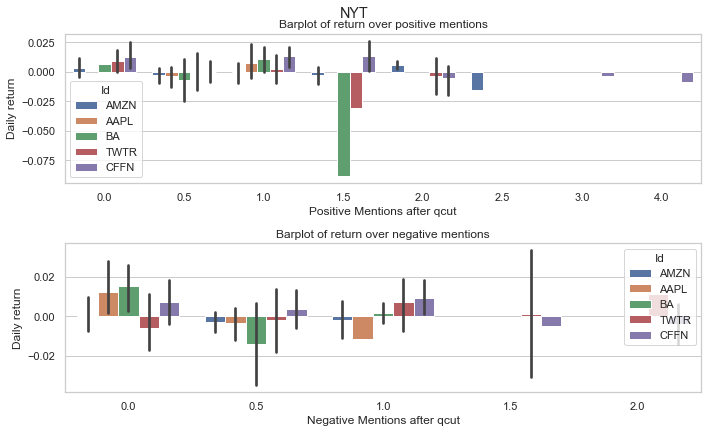

In [74]:
fig = plt.figure(figsize=(10, 6))

ax = plt.subplot(211)
sns.barplot(data=df_nyt_merge, x='Positive Mentions after qcut',
            y='Daily return', hue="Id", ax=ax)
ax.set_title('Barplot of return over positive mentions')

ax = plt.subplot(212)
sns.barplot(data=df_nyt_merge, x='Negative Mentions after qcut',
            y='Daily return', hue="Id", ax=ax)
ax.set_title('Barplot of return over negative mentions')

plt.tight_layout()
plt.suptitle("NYT",y=1)
plt.show()

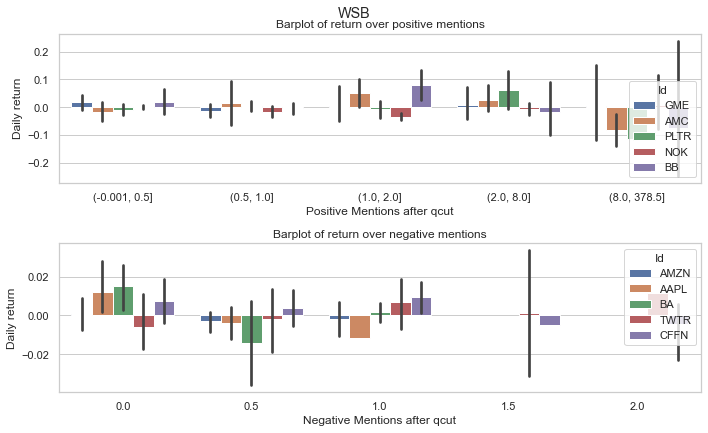

In [75]:
fig = plt.figure(figsize=(10, 6))

ax = plt.subplot(211)
sns.barplot(data=df_wsb_merge, x='Positive Mentions after qcut',
            y='Daily return', hue="Id", ax=ax)
ax.set_title('Barplot of return over positive mentions')

ax = plt.subplot(212)
sns.barplot(data=df_nyt_merge, x='Negative Mentions after qcut',
            y='Daily return', hue="Id", ax=ax)
ax.set_title('Barplot of return over negative mentions')

plt.tight_layout()
plt.suptitle("WSB",y=1)
plt.show()